# Rotational dynamics Quickstart

Calculation of rotational (and generally ro-vibrational) dynamics proceeds in two steps. At the first step, we obtain molecular field-free rotational energies and wave functions, which we use as basis for representing the time-dependent wavepacket in the presence of time-varying field or field-dressed states in the case of static field. The interaction of the molecule with field is described in terms of multipole moments, such as the permanent dipole moment, polarizability, hyper-polarizability, quadrupole moment, etc. The matrix elements of these interaction tensors, defined with respect to the laboratory frame, are computed in the basis of the field-free wave functions. At the second step, we solve the time-dependent problem with applied external electric and/or magnetic fields using the matrix elements of interaction tensors to build the time-dependent Hamiltonian.

## Molecular field-free rotational solutions

In [1]:
from richmol.rot import Molecule, solve, LabTensor

Here is an example for water molecule, using the data obtained from a quantum chemical calculation

In [2]:
water = Molecule()

# Cartesian coordinates of atoms
water.XYZ = ("bohr",
             "O",  0.00000000,   0.00000000,   0.12395915,
             "H",  0.00000000,  -1.43102686,  -0.98366080,
             "H",  0.00000000,   1.43102686,  -0.98366080)

# choose frame of principal axes of inertia
water.frame = "ipas"

# molecular-frame dipole moment (au)
water.dip = [0, 0, -0.7288]

# molecular-frame polarizability tensor (au)
water.pol = [[9.1369, 0, 0], [0, 9.8701, 0], [0, 0, 9.4486]]

# symmetry group
water.sym = "D2"

# rotational solutions for J=0..5
Jmax = 5
sol = solve(water, Jmin=0, Jmax=Jmax)

# laboratory-frame dipole moment operator
dip = LabTensor(water.dip, sol, thresh=1e-12) # neglect matrix elements smaller than `thresh`

# laboratory-frame polarizability tensor
pol = LabTensor(water.pol, sol, thresh=1e-12)

# field-free Hamiltonian
h0 = LabTensor(water, sol, thresh=1e-12)

Here, `water.XYZ` is used to define molecular geometry. By default, calculations are carried out for the main isotopologue. To specify a non-standard isotope, put the corresponding isotope number next to the atom label, for example, `"O18"` for $^{18}O$ or `"H2"` for deuterium. The properties `water.dip` and `water.pol` determine dipole moment and polarizability, respectively, defined with respect to the same frame as Cartesian coordinates of atoms in `water.XYZ`. The orientation of molecular axes wrt molecule is determined by `water.frame="ipas"`, in the present case we choose the inertial principal axes system. The molecular symmetry group is specified in `water.sym="D2"`, here we choose rotational symmetry group. The variational solutions are obtained using `solve` function for a range of $J$ quanta from `Jmin` to `Jmax`. It outputs a dictionary type object `sol[J][sym]` for different values of $J$ and different symmetries. Finally, `LabTensor` computes matrix elements of laboratory-frame dipole moment and polarizability tensors in the basis `sol`. When `LabTensor` is applied to a molecule object, i.e. `water` in this case, it converts the field-free solutions `sol` into the same form as a laboratory-frame tensor, which is convenient for building the total molecule-field interaction Hamiltonian.

The field-free rotational energies and wave functions are contained in the dictionary object `sol[J][sym]` for different values of quantum number $J$ (int) and different symmetries (str) of the $D_2$ rotational group (`water.sym="D2"`). The rotational energies and assignments (by the $J, k, \tau$ quantum numbers) can be printed out as following

In [3]:
print("J  sym #    energy      J   k  tau  |leading coef|^2")
for J in sol.keys():
    for sym in sol[J].keys():
        for i in range(sol[J][sym].nstates):
            print(J, "%4s"%sym, i, "%12.6f"%sol[J][sym].enr[i], sol[J][sym].assign[i])

J  sym #    energy      J   k  tau  |leading coef|^2
0    A 0     0.000000 ['0' '0' '0' ' 1.000000']
1   B1 0    41.996372 ['1' '0' '1' ' 1.000000']
1   B2 0    36.931654 ['1' '1' '0' ' 1.000000']
1   B3 0    24.103743 ['1' '1' '1' ' 1.000000']
2    A 0    71.083285 ['2' '2' '0' ' 0.859287']
2    A 1   134.980252 ['2' '0' '0' ' 0.859287']
2   B1 0    80.074422 ['2' '2' '1' ' 1.000000']
2   B2 0    95.268576 ['2' '1' '0' ' 1.000000']
2   B3 0   133.752307 ['2' '1' '1' ' 1.000000']
3    A 0   206.063537 ['3' '2' '0' ' 1.000000']
3   B1 0   174.290919 ['3' '2' '1' ' 0.709733']
3   B1 1   283.750848 ['3' '0' '1' ' 0.709733']
3   B2 0   144.095391 ['3' '3' '0' ' 0.967197']
3   B2 1   283.558067 ['3' '1' '0' ' 0.967197']
3   B3 0   138.894101 ['3' '3' '1' ' 0.865893']
3   B3 1   211.791894 ['3' '1' '1' ' 0.865893']
4    A 0   225.839342 ['4' '4' '0' ' 0.897851']
4    A 1   316.682576 ['4' '2' '0' ' 0.534048']
4    A 2   487.795766 ['4' '0' '0' ' 0.612490']
4   B1 0   228.396486 ['4' '4' '1' 

Here, $k$ is the quantum number of the rotational angular momentum projection onto the molecular $z$ axis, $\tau$ is rotational parity, defined as $(-1)^\tau$, and coefficient corresponds to the leading symmetric-top function in the wave function expansion. We can print second and third (and more) leading contributions by setting `sol[J][sym].assign_nprim = 3` for selected $J$ and symmetry.

The matrix elements of laboratory-frame tensors in the basis of field-free rotational solutions can be retrieved in dense or sparse formats using `tomat` method, for example

In [4]:
# X-component of dipole moment
mu_x = dip.tomat(form="full", cart="x")

# XZ-component of polarizability
alpha_xz = pol.tomat(form="full", cart="xz")

# field-free Hamiltonian
h0mat = h0.tomat(form="full", cart="0")

print("matrix dimensions:", h0mat.shape)
print("dipole X:", mu_x)
print("\npolarizability XZ:", alpha_xz)
print("\nfield-free Hamiltonian:", h0mat)

matrix dimensions: (286, 286)
dipole X:   (0, 4)	(-9.739787996057844e-35-0.2975313540900633j)
  (0, 6)	(9.739787996057844e-35+0.2975313540900633j)
  (1, 8)	(-8.434903832060798e-35-0.25766971106437786j)
  (1, 30)	(1.3610889671164236e-34+0.2822630262715965j)
  (1, 32)	(-5.55662243994505e-35-0.11523339793653574j)
  (2, 7)	(-8.434903832060798e-35-0.25766971106437786j)
  (2, 9)	(-8.434903832060798e-35-0.25766971106437786j)
  (2, 31)	(9.624352384462173e-35+0.19959009995488255j)
  (2, 33)	(-9.624352384462173e-35-0.19959009995488255j)
  (3, 8)	(-8.434903832060798e-35-0.25766971106437786j)
  (3, 32)	(5.55662243994505e-35+0.11523339793653574j)
  (3, 34)	(-1.3610889671164236e-34-0.2822630262715965j)
  (4, 0)	(-9.739787996057844e-35+0.2975313540900633j)
  (4, 10)	(3.774036515276408e-33+0.20052055607190467j)
  (4, 11)	(1.887018257638204e-33+0.25694628736880804j)
  (4, 14)	(-1.5407439555097885e-33-0.08186217421921828j)
  (4, 15)	(-7.7037197775489426e-34-0.10489788255935238j)
  (5, 12)	(2.66864681239

B default, the basis of field-free rotational solutions is spanned by $J$ ranging from `Jmin` to `Jmax` (in `solve`), $m=-J..J$, $k=0..J$, and $\tau=0,1$. The assignment of basis states by symmetric-top functions can be obtained using `assign` method

In [5]:
assign_bra, assign_ket = h0.assign(form="full") # assignment of braand ket states, i.e. `assign_bra` and `assign_ket` are equivalent in this case
assign = assign_bra

# print assignment of first 20 states
for i in range(20):
    print(i, "J =", assign["J"][i], ", sym =", assign["sym"][i], ", m =", assign["m"][i], ", k =", assign["k"][i])

0 J = 0.0 , sym = A , m = 0 , k = ('0 0 0  1.000000', 0.0)
1 J = 1.0 , sym = B1 , m = -1 , k = ('1 0 1  1.000000', 41.996371682354464)
2 J = 1.0 , sym = B1 , m = 0 , k = ('1 0 1  1.000000', 41.996371682354464)
3 J = 1.0 , sym = B1 , m = 1 , k = ('1 0 1  1.000000', 41.996371682354464)
4 J = 1.0 , sym = B2 , m = -1 , k = ('1 1 0  1.000000', 36.93165361155496)
5 J = 1.0 , sym = B2 , m = 0 , k = ('1 1 0  1.000000', 36.93165361155496)
6 J = 1.0 , sym = B2 , m = 1 , k = ('1 1 0  1.000000', 36.93165361155496)
7 J = 1.0 , sym = B3 , m = -1 , k = ('1 1 1  1.000000', 24.103743154821103)
8 J = 1.0 , sym = B3 , m = 0 , k = ('1 1 1  1.000000', 24.103743154821103)
9 J = 1.0 , sym = B3 , m = 1 , k = ('1 1 1  1.000000', 24.103743154821103)
10 J = 2.0 , sym = A , m = -2 , k = ('2 2 0  0.859287', 71.08328455834958)
11 J = 2.0 , sym = A , m = -2 , k = ('2 0 0  0.859287', 134.98025233911153)
12 J = 2.0 , sym = A , m = -1 , k = ('2 2 0  0.859287', 71.08328455834958)
13 J = 2.0 , sym = A , m = -1 , k = ('2 

Here, `assign["J"]`, `assign["m"]`, `assign["sym"]` contain assignments by 'good' quantum numbers $J$, $m$, and symmetry, respectively. `assign["k"]` contains rotational state assignment by $J$, $k$, and $\tau$ quantum numbers (same as returned by `sol[J][sym].assign` in the example above) and its energy.

## Storing and reading matrix elements from HDF5 files

The calculation of field-free energies and matrix elements of interaction tensors can be computationally expensive, especially if one considers the vibrational motions as well. Once computed, the rotational solutions and matrix elements can be stored in an HDF5 format file. The HDF5 files containing rotational, ro-vibrational, and even hyperfine solutions and matrix elements for different molecules can be produced by other programs, such as, for example, [TROVE](https://github.com/Trovemaster/TROVE), `richmol.hyfor`, and GENIUSH. A collection of such files for different molecules is available through "Richmol database" section of the main documentation.

To store matrix elements, use `store` method

In [6]:
dip.store("water.h5", replace=True, comment="dipole moment in au computed using CCSD(T)/AVTZ")
pol.store("water.h5", replace=True, comment="polarizability in au computed using CCSD(T)/AVTZ")
h0.store("water.h5", replace=True, comment="rot solutions from CCSD(T)/AVTZ equilibrium geometry")

Loading matrix elements from file can be achieved via initialization of the general class `field.CarTens` for representing the interaction tensors

In [7]:
from richmol.field import CarTens

dip2 = CarTens(filename="water.h5", name="dip")
print("\ndipole:", dip2.__doc__)

pol2 = CarTens(filename="water.h5", name="pol")
print("\npolarizability:", pol2.__doc__)

h02 = CarTens(filename="water.h5", name="h0")
print("\nfield-free H0:", h02.__doc__)


dipole: Cartesian tensor operator, store date: 2021-06-16 10:10:38, comment: dipole moment in au computed using CCSD(T)/AVTZ

polarizability: Cartesian tensor operator, store date: 2021-06-16 10:10:38, comment: polarizability in au computed using CCSD(T)/AVTZ

field-free H0: Cartesian tensor operator, store date: 2021-06-16 10:10:38, comment: rot solutions from CCSD(T)/AVTZ equilibrium geometry


## Static field simulations

Once the field-free solutions and matrix elements are obtained, the simulations of the field dynamics are straightforward.

As an example, let's apply static electric field of different strength along the laboratory-frame $Z$ axis and compute the associated Stark shifts of rotational energies and field-dressed dipole moment for water molecule

In [8]:
import numpy as np
from richmol.convert_units import AUdip_x_Vm_to_invcm

enr = []
muz = []

fz_grid = np.linspace(1, 1000*100, 10) # field in units V/m

muz0 = dip.tomat(form="full", cart="z") # matrix representation of Z-dipole at zero field
print(f"matrix dimensions:", muz0.shape)

for fz in fz_grid:

    field = [0, 0, fz] # X, Y, Z field components

    # Hamiltonian
    h = h0 - dip * field * AUdip_x_Vm_to_invcm() # `AUdip_x_Vm_to_invcm` converts dipole(au) * field(V/m) into cm^-1

    # eigenproblem solution
    e, v = np.linalg.eigh(h.tomat(form='full', repres='dense'))

    # keep field-dressed energies
    enr.append([elem for elem in e])

    # keep field-dressed matrix elements of Z-dipole
    muz.append( np.dot(np.conj(v.T), muz0.dot(v)) )

matrix dimensions: (286, 286)


Plot the results for selected state index

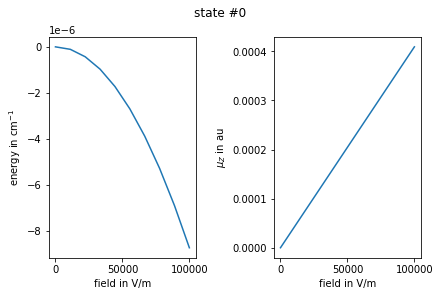

In [9]:
import matplotlib.pyplot as plt

# plot energies and dipoles vs field

enr = np.array(enr)
muz = np.array(muz)

istate = 0 # choose state index

fig, (ax1, ax2) = plt.subplots(1,2, constrained_layout=True)
plt.suptitle(f"state #{istate}")
ax1.set_ylabel("energy in cm$^{-1}$")
ax1.set_xlabel("field in V/m")
ax2.set_ylabel("$\\mu_Z$ in au")
ax2.set_xlabel("field in V/m")
ax1.plot(fz_grid, enr[:, istate])
ax2.plot(fz_grid, muz[:, istate, istate].real)
plt.show()

Owing to the dipole selection rules, the field applied along the laboratory $Z$ axis can only couple molecular states with the same $m$ quantum number. We can exploit this in the above calculations by running a loop over $m=-J_\text{max}..J_\text{max}$ where in a loop we extract a sub-matrix of tensor matrix elements corresponding to the current $m$. To extract a sub-matrix corresponding to a basis spanned by a defined sub-space of quantum numbers, one can use `filter` method (modifies tensor in place) or `field.filter` function (creates new object). The filter function accepts as arguments state quantum numbers $J$, $m$, and $k$, symmetry, and energy and returns `True` or `False` depending on if the corresponding state needs to be included or excluded form the basis. Below is an example of how we can do it in the above calculations of Stark effect

In [10]:
from richmol.field import filter
import numpy as np
from richmol.convert_units import AUdip_x_Vm_to_invcm

def flt(**kw):
    """Filter function to select states with m = m_"""
    if 'm' in kw:
        m = kw['m']
        return m == m_
    return True

enr = {}
muz = {}
assign = {}

fz_grid = np.linspace(1, 1000*100, 10)  # field in units V/m

for m_ in range(-Jmax, Jmax+1):

    dip_m = filter(dip, bra=flt, ket=flt)
    h0_m = filter(h0, bra=flt, ket=flt)

    muz0 = dip_m.tomat(form="full", cart="z") # matrix representation of Z-dipole at zero field
    print(f"matrix dimensions for m = {m_}:", muz0.shape)

    enr[m_] = []
    muz[m_] = []
    assign[m_] = []
    
    for fz in fz_grid: # field in V/m

        field = [0, 0, fz] # X, Y, Z field components in V/m

        # Hamiltonian
        h = h0_m - dip_m * field * AUdip_x_Vm_to_invcm() # `AUdip_x_Vm_to_invcm` converts dipole(au) * field(V/m) into cm^-1

        # eigenproblem solution
        e, v = np.linalg.eigh(h.tomat(form='full', repres='dense'))

        # keep field-dressed energies
        enr[m_].append([elem for elem in e])

        # keep field-dressed matrix elements of Z-dipole
        muz[m_].append( np.dot(np.conjugate(v.T), muz0.dot(v)) )

        # keep state assignment by one leading basis fuction
        ind = np.argmax(np.abs(v), axis=0)
        assgn, _ = h0_m.assign(form="full")
        assign[m_].append( {key : [val[i] for i in ind] for key, val in assgn.items()} )

matrix dimensions for m = -5: (11, 11)
matrix dimensions for m = -4: (20, 20)
matrix dimensions for m = -3: (27, 27)
matrix dimensions for m = -2: (32, 32)
matrix dimensions for m = -1: (35, 35)
matrix dimensions for m = 0: (36, 36)
matrix dimensions for m = 1: (35, 35)
matrix dimensions for m = 2: (32, 32)
matrix dimensions for m = 3: (27, 27)
matrix dimensions for m = 4: (20, 20)
matrix dimensions for m = 5: (11, 11)


Plot the results for selected state index and $m$

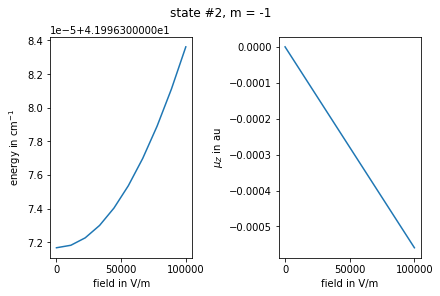

In [11]:
import matplotlib.pyplot as plt

# plot energies and dipoles vs field

enr = {m : np.array(val) for m, val in enr.items()}
muz = {m: np.array(val) for m, val in muz.items()}

istate = 2
m = -1

fig, (ax1, ax2) = plt.subplots(1,2, constrained_layout=True)
plt.suptitle(f"state #{istate}, m = {m}")
ax1.set_ylabel("energy in cm$^{-1}$")
ax1.set_xlabel("field in V/m")
ax2.set_ylabel("$\\mu_Z$ in au")
ax2.set_xlabel("field in V/m")
ax1.plot(fz_grid, enr[m][:, istate])
ax2.plot(fz_grid, muz[m][:, istate, istate].real)
plt.show()

Here we print the assignment of a selected state for different values of field

In [12]:
istate = 20
m = -3
for i, fz in enumerate(fz_grid):
    print("Fz =", fz, "J = ", assign[m][i]["J"][istate],
          "sym = ", assign[m][i]["sym"][istate],
          "m = ", assign[m][i]["m"][istate],
          "k = ", assign[m][i]["k"][istate])

Fz = 1.0 J =  4.0 sym =  A m =  -3 k =  ('4 0 0  0.612490', 487.7957659362319)
Fz = 11112.0 J =  4.0 sym =  A m =  -3 k =  ('4 0 0  0.612490', 487.7957659362319)
Fz = 22223.0 J =  4.0 sym =  A m =  -3 k =  ('4 0 0  0.612490', 487.7957659362319)
Fz = 33334.0 J =  4.0 sym =  A m =  -3 k =  ('4 0 0  0.612490', 487.7957659362319)
Fz = 44445.0 J =  4.0 sym =  A m =  -3 k =  ('4 0 0  0.612490', 487.7957659362319)
Fz = 55556.0 J =  4.0 sym =  A m =  -3 k =  ('4 0 0  0.612490', 487.7957659362319)
Fz = 66667.0 J =  4.0 sym =  A m =  -3 k =  ('4 0 0  0.612490', 487.7957659362319)
Fz = 77778.0 J =  4.0 sym =  A m =  -3 k =  ('4 0 0  0.612490', 487.7957659362319)
Fz = 88889.0 J =  4.0 sym =  A m =  -3 k =  ('4 0 0  0.612490', 487.7957659362319)
Fz = 100000.0 J =  4.0 sym =  A m =  -3 k =  ('4 0 0  0.612490', 487.7957659362319)


## Time-dependent simulations

As an example, let's simulate the laser induced 'truncated-pulse' alignment of linear OCS molecule.

In [13]:
from richmol.rot import Molecule, solve, LabTensor
from richmol.tdse import TDSE
from richmol.convert_units import AUpol_x_Vm_to_invcm
from richmol.field import filter
import numpy as np
import matplotlib.pyplot as plt

To begin, compute the field-free energies, matrix elements of polarizability interaction tensor, and matrix elements of cosine and squared cosine functions of the Euler angle $\theta$, that are used to quantify the degree of orientation and alignment, respectively

In [14]:
ocs = Molecule()

ocs.XYZ = ("angstrom",
           "C",  0.0,  0.0,  -0.522939783141,
           "O",  0.0,  0.0,  -1.680839357,
           "S",  0.0,  0.0,  1.037160128)

# molecular-frame dipole moment (in au)
ocs.dip = [0, 0, -0.31093]

# molecular-frame polarizability tensor (in au)
ocs.pol = [[25.5778097, 0, 0], [0, 25.5778097, 0], [0, 0, 52.4651140]]

Jmax = 10
sol = solve(ocs, Jmax=Jmax)

# laboratory-frame dipole moment operator
dip = LabTensor(ocs.dip, sol)

# laboratory-frame polarizability tensor
pol = LabTensor(ocs.pol, sol)

# field-free Hamiltonian
h0 = LabTensor(ocs, sol)

# matrix elements of cos(theta)
cos = LabTensor("costheta", sol)

# matrix elements of cos^2(theta)
cos2 = LabTensor("cos2theta", sol) # NOTE: you need to add a constant factor 1/3 to get the true values

At the next step, we define the external electric field. Here we load it from the file "trunc_pulse.txt". The field in units V/cm has a single $Z$ component and is defined on a time grid ranging from 0 to 300 picoseconds

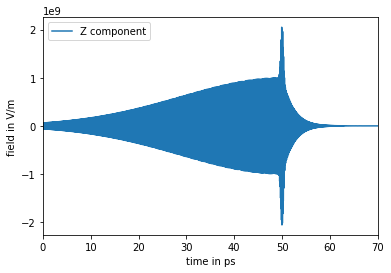

In [15]:
# truncated-pulse field
with open("trunc_pulse.txt", "r") as fl:
    field = np.array([[float(elem) for elem in line.split()[1:]] for line in fl]) # X, Y, Z field's components
    fl.seek(0)
    times = [float(line.split()[0]) for line in fl] # time grid

# convert field from V/cm to V/m
field *= 1e2

# plot Z component
plt.plot(times, field[:, 2], label="Z component")
plt.xlim([0,70]) # plot first 70 ps
plt.xlabel("time in ps")
plt.ylabel("field in V/m")
plt.legend()
plt.show()

Finally, we generate the initial states, set up the molecule-field interaction Hamiltonian and parameters of time-dependent solution, and run propagation. For initial states let's assume a temperature of $T=0$ Kelvin and use the eigenfunctions of field-free operator `h0` as initial state vectors. Run dynamics from time zero to 200 ps with a time step of 10 fs

In [16]:
tdse = TDSE(t_start=0, t_end=200, dt=0.01, t_units="ps", enr_units="invcm")

# initial states - Boltzmann-weighted eigenfunctions of `h0`, at T=0 K - only ground state
vecs = tdse.init_state(h0, temp=0)

# interaction Hamiltonian
H = -1/2 * pol * AUpol_x_Vm_to_invcm() # `AUpol_x_Vm_to_invcm` converts pol[au]*field[V/m] into [cm^-1]

# matrix elements of cos^2(theta)
cos2mat = cos2.tomat(form="full", cart="0")

cos2_expval = []

for i, t in enumerate(tdse.time_grid()):

    # apply field to Hamiltonian
    H.field([0, 0, field[i, 2]], thresh=1e2) # TODO: iprove performance of H * field operation

    # update vector
    vecs, t_ = tdse.update(H, H0=h0, vecs=vecs, matvec_lib='scipy')

    # expectation value of cos^2(theta)-1/3
    expval = sum(np.dot(np.conj(vecs[i][:]), cos2mat.dot(vecs[i][:])) for i in range(len(vecs)))
    cos2_expval.append(expval)

    if i % 1000 == 0:
        print(t, expval+1/3)

0.005 (0.33333335011354287-3.3881317890172014e-21j)
10.005 (0.34739158187693825-1.734723475976807e-18j)
20.005 (0.4213669350942997-1.0408340855860843e-17j)
30.005 (0.6609918655846478-2.7755575615628914e-17j)
40.005 (0.7625355344088344-2.7755575615628914e-17j)
50.005 (0.8276490955449676-2.7755575615628914e-17j)
60.005 (0.3821142205456442+5.551115123125783e-17j)
70.005 (0.19957705807366488-2.7755575615628914e-17j)
80.005 (0.6003828777604131+1.3877787807814457e-17j)
90.005 (0.2129905474603741+1.3877787807814457e-17j)
100.005 (0.5206370845603439-8.326672684688674e-17j)
110.005 (0.7736959532358003+2.7755575615628914e-17j)
120.005 (0.2798285070002713+2.7755575615628914e-17j)
130.005 (0.5766604584449334-1.3877787807814457e-17j)
140.005 (0.40216250912200846+5.551115123125783e-17j)
150.005 (0.12101474958572211-2.7755575615628914e-17j)
160.005 (0.6639581214246747-3.469446951953614e-17j)
170.005 (0.4410383542446014+3.8163916471489756e-17j)
180.005 (0.47123931234359556-6.938893903907228e-17j)
190.

Plot the expectation value of $\cos^2\theta$ and compare with some reference values (obtained with a different code)

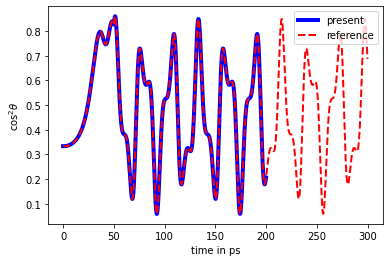

In [17]:
plt.plot([t for t in tdse.time_grid()], [elem.real + 1/3 for elem in cos2_expval], 'b', linewidth=4, label="present")

# compare with reference results
with open("trunc_pulse_cos2theta.txt", "r") as fl:
    cos2_expval_ref = np.array([float(line.split()[1]) for line in fl])
    fl.seek(0)
    times_ref = np.array([float(line.split()[0]) for line in fl])

plt.plot(times_ref, cos2_expval_ref, 'r--', linewidth=2, label="reference")
plt.xlabel("time in ps")
plt.ylabel("$\cos^2\\theta$")
plt.legend()
plt.show()

Since the alignment field is applied along the $Z$ axis and thus couples only the states with the same $m$ quanta, we can split the full calculation into several for different values of $m=-J_\text{max}..J_\text{max}$. For initial temperature of $T=0$ K, simulations with $m=0$ only are necessary

In [18]:
def flt(**kw):
    """Filter function to select states with m = m_"""
    if 'm' in kw:
        m = kw['m']
        return m == m_
    return True

cos2_expval = []

m_ = 0

h0_m = filter(h0, bra=flt, ket=flt)
pol_m = filter(pol, bra=flt, ket=flt)
cos2_m = filter(cos2, bra=flt, ket=flt)

tdse = TDSE(t_start=0, t_end=200, dt=0.01, t_units="ps", enr_units="invcm")

# initial states - Boltzmann-weighted eigenfunctions of `h0`, at T=0 K - only ground state
vecs = tdse.init_state(h0_m, temp=0)

# interaction Hamiltonian
H = -1/2 * pol_m * AUpol_x_Vm_to_invcm()

# matrix elements of cos^2(theta) in dense matrix representation
cos2mat = cos2_m.tomat(form="full", cart="0")

print(f"run m = {m_}, basis dimensions = {cos2mat.shape}")

for i, t in enumerate(tdse.time_grid()):

    # apply field to Hamiltonian
    H.field([0, 0, field[i, 2]], thresh=1e2) # TODO: iprove performance of H * field operation

    # update vector
    vecs, t_ = tdse.update(H, H0=h0_m, vecs=vecs, matvec_lib='scipy')

    # expectation value of cos^2(theta)-1/3
    expval = sum(np.dot(np.conj(vecs[i][:]), cos2mat.dot(vecs[i][:])) for i in range(len(vecs)))
    cos2_expval.append(expval)

    if i % 1000 == 0:
        print(m_, t, expval+1/3)

run m = 0, basis dimensions = (11, 11)
0 0.005 (0.33333335011354287-3.3881317890172014e-21j)
0 10.005 (0.34739158187693825+0j)
0 20.005 (0.4213669350942996-1.3877787807814457e-17j)
0 30.005 (0.6609918655846474+2.7755575615628914e-17j)
0 40.005 (0.7625355344088345-5.551115123125783e-17j)
0 50.005 (0.8276490955449656+2.7755575615628914e-17j)
0 60.005 (0.38211422054564265+5.551115123125783e-17j)
0 70.005 (0.19957705807366558-4.163336342344337e-17j)
0 80.005 (0.6003828777604128-1.3877787807814457e-17j)
0 90.005 (0.21299054746037452-6.938893903907228e-18j)
0 100.005 (0.5206370845603434-8.326672684688674e-17j)
0 110.005 (0.7736959532357975+5.551115123125783e-17j)
0 120.005 (0.2798285070002692+0j)
0 130.005 (0.576660458444932-1.3877787807814457e-17j)
0 140.005 (0.4021625091220066+2.7755575615628914e-17j)
0 150.005 (0.1210147495857242-4.163336342344337e-17j)
0 160.005 (0.6639581214246741-4.163336342344337e-17j)
0 170.005 (0.4410383542445989+5.204170427930421e-17j)
0 180.005 (0.4712393123435934

Plot the expectation value of $\cos^2\theta$ and compare with reference values

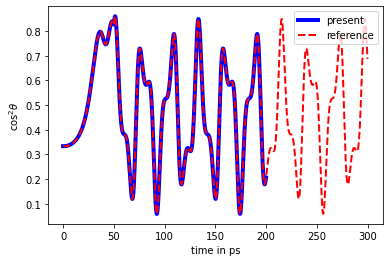

In [19]:
plt.plot([t for t in tdse.time_grid()], [elem.real + 1/3 for elem in cos2_expval], 'b', linewidth=4, label="present")

# compare with reference results
with open("trunc_pulse_cos2theta.txt", "r") as fl:
    cos2_expval_ref = np.array([float(line.split()[1]) for line in fl])
    fl.seek(0)
    times_ref = np.array([float(line.split()[0]) for line in fl])

plt.plot(times_ref, cos2_expval_ref, 'r--', linewidth=2, label="reference")
plt.xlabel("time in ps")
plt.ylabel("$\cos^2\\theta$")
plt.legend()
plt.show()